For this problem, we will consider two ways to parametrize sleep and quantify how well they stack up against experimental data. As the backbone of our analysis, we will assume that mutant strains demonstrate statistically significant differences from wild type strains in sleep behavior. Note that Justin's tutorial named "Defining parameters and estimating them" shows that our assumption is justified and that the difference in the posterior distributions of mutant and wild type strains can act as a measure of how accurate our parameters are. In other words, we will test our sleep parameters based on how well they separate the mutant strain from the wild type strain.

Method 1 : We define sleep as at least 6 consecutive minutes of zero activity ( =< 0.001 ). The parameter of consideration is the mean number of sleep bouts. In our analysis, we round down fractional bouts (e.g. 6 consecutive minutes of zero activity constitutes one sleep bout, as do 11 consecutive minutes. However, 12 consecutive minutes of zero activity corresponds to 2 sleep bouts). Even though this metric is fairly arbitrary, if it succeeds in distinguishing between the two strains, it is valid for our purposes.

To test whether our parameter describes the experimental data, we will find the posterior distributions of the wild type and mutant strains and evaluate the area under both curves. If it is less than 5% of the total area under either of the two curves, then we will conclude that our sleep parameter is well chosen and that it succeeds in distinguishing between the two strains. 

(Note that the 5% threshold is arbitrary. Nevertheless, we think it is a reasonably small threshold to compare the two distributions and comment on whether they are sufficiently "different".)




<div class="alert alert-info">I appreciate you being very explicit as to why separation of the different genotypes might be a useful way to determine the goodness of a metric. _However,_ just be warned that if the separation of the genotypes tells you the metric is good, I don't think you can then argue that the quantitative difference of the groups is a useful piece of information. (You found in the data what you expected to find, and designed your analysis to find, in the data, which isn't necessarily novel.) In general, you want biological or common sense reasons for your metric to be a good one, andt then the resulting distinction of the groups is more meaningful. </div>

First, we import the relevant modules and the tidied data from Tutorial 2.1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.special
%matplotlib inline

fname = '../data/130315_1_minute_intervals.csv'
df_gt = pd.read_csv(fname, delimiter=',', comment='#')
df_gt

,fish,genotype,day,light,CLOCK,zeit,activity,window
0,1,het,0,True,9.519,9.519,0.6,NaN
1,1,het,0,True,9.536,9.536,1.9,NaN
2,1,het,0,True,9.553,9.553,1.9,NaN
3,1,het,0,True,9.569,9.569,13.4,NaN
4,1,het,0,True,9.586,9.586,15.4,NaN
5,1,het,0,True,9.603,9.603,12.7,NaN
6,1,het,0,True,9.619,9.619,11.4,NaN
7,1,het,0,True,9.636,9.636,11.6,NaN
8,1,het,0,True,9.652,9.652,8.4,NaN
9,1,het,0,True,9.669,9.669,3.2,8.050000e+01


The code below loops through and returns three arrays that contain the mean sleep bout for each fish.  

In [2]:
fishIds = df_gt.iloc[:, 0].tolist()
fishTypes = df_gt.iloc[:,1].tolist()
fishActivity = df_gt.iloc[:,6].tolist()

mut = []
wt = []
het = []
totalZeroes = 0
totalPeriods = 0
totalZeroesWt = 0
totalPeriodsWt = 0
totalZeroesMut = 0
totalPeriodsMut = 0
num_sleep = 0
sleepind = 0
for i in range(len(fishIds)):
    if (i > 0 and fishIds[i] != fishIds[i-1]):
        if (fishTypes[i-1] == "wt"):
            wt.append(num_sleep)
            sleepind = 0
            num_sleep = 0
        elif (fishTypes[i-1] == "mut"):
            mut.append(num_sleep)
            sleepind = 0
            num_sleep = 0
        else:
            het.append(num_sleep)
            sleepind = 0        
            num_sleep = 0
    if (fishActivity[i] >= 0.001):
        sleepind = 0
    if (fishActivity[i] < 0.001):
        sleepind += 1
    if (sleepind == 5):
        num_sleep += 1
        sleepind = 0

mut = np.asarray(mut)
het = np.asarray(het)
wt = np.asarray(wt)

According to the Central Limit Theorem, the sum of independent, identically distributed (i.i.d) random variables approaches a Gaussian for large sample size. Notice that "mean" is nothing but the sum divided by the sample size, which is a constant. Therefore, the mean of a large number of i.i.d random variables is also normally distributed.

During the lecture, we showed that the posterior distribution of a Gaussian prior is given by the Student t distribution. We will use Justin's function from the tutorial. 

<div class="alert alert-info">I think you mean Gaussian likelihood and Jeffreys prior, after you marginalize over $\sigma$? </div>

In [3]:
def student_t(mu, x):
    """
    Returns the Student-t distribution for values of mu with data x.
    We could use scipy.stats for this, but we'll do it ourselves.
    """
    # Number of data
    n = len(x)
    
    # Mean of data
    x_mean = x.mean()
    
    # Compute r^2
    r2 = ((x - x_mean)**2).sum() / n
    
    # Compute the mu-dependent part
    t = (1.0 + (mu - x_mean)**2 / r2)**(-n / 2.0)
    
    # Normalize and return
    return -scipy.special.beta(-0.5, n / 2.0) / 2.0 / np.pi / np.sqrt(r2) * t,x_mean,r2

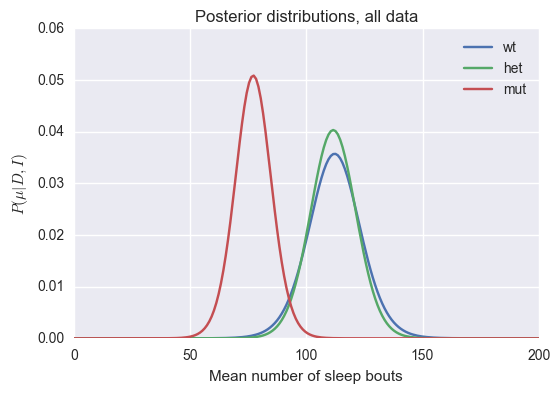

In [4]:
# Set up values of mu to consider in plot
mu = np.linspace(0.0, 200.0, 200)

# Compute posterior for each of the samples
post_wt,meanwt,varwt = student_t(mu, wt)
post_het,meanhet,varhet = student_t(mu, het)
post_mut,meanmut,varmut = student_t(mu, mut)

# Plot the result
plt.plot(mu, post_wt)
plt.plot(mu, post_het)
plt.plot(mu, post_mut)
plt.xlabel('Mean number of sleep bouts')
plt.ylabel(r'$P(\mu|D,I)$')
plt.title('Posterior distributions, all data')
lg = plt.legend(('wt', 'het', 'mut'), loc='upper right')

<div class="alert alert-info">A bit confused about what you're plotting here- is it mean _number_ of sleep bouts, or mean sleep bout length (which appears to be what you calculated above)? Maybe be a little more precise with comments / labels. </div>

The above plot shows two important things: 

1. As expected, mutant fish have lower mean sleep bouts than wild type and heterozygous fish.
2. Similar to what we saw in the tutorial, wild type and heterozygous fish demonstrate similar sleep patterns.

Now, let's quantify the area under both mutant and wild type curves. We will use the trapezoidal approximation:

First, let's find the index of the intersection between the two curves. Eyeballing the two curves, we see that it is somewhere between 75 and 100 sleep bouts. We can approximate the intersection as the point at which the distance between the two curves is minimized.

In [5]:
distarray = [0] * 25
for i in range(75,100):
    distarray[i-75] = abs(post_wt[i] - post_mut[i])
distarray.index(min(distarray))

17

The intersection corresponds to the 17th index after 75, which is the 92nd index in the original expression. Now, we approximate the area under the wild type curve up to the 92nd index:

In [6]:
np.trapz(post_wt[0:92],mu[0:92])

0.03938069412076102

The points up to the 92nd index span approximately 3.9% of the total area. Now, let's calculate the area below the mutant strain after the 92nd index: 

In [7]:
np.trapz(post_mut[92:200],mu[92:200])

0.031127035839086475

The area beyond the 92nd index is 3.1% of the total area below the mutant strain. The total area is 2 - (0.031 + 0.039) = 1.93. 
Intersection corresponds to (0.031 + 0.039) / 1.93 = 3.6% of the total area under both curves.

Notice that the intersection is less than 5% of the total area under both curves. This suggests that our method is justified. 

We conclude that it is reasonable to define sleep as 6 consecutive minutes of zero activity. 

<div class="alert alert-info">I'm not sure I follow, just because if you're trying to compute the union, you need to correct for double-counting, but don't you do that by subtracting the intersection just once? I'm not entirely sure, but your point that the intersection is small is still true. It also suggests that it's reasonable to define sleep as 6 consecutive minutes, but note that, because the goodness of the metric rests on the degree of separation, you might also wnat to try other lengths of consecutive minutes (say 2 or 12) that separate the data more completely. Starting from a more biological measure of goodness (e.g. no zebrafish sleeps for fewer than six minutes) you wouldn't have to do such extensive checks! </div>

Now, let's analyze the nighttime and daytime behavior of the three strains. 

In [8]:
df_new = df_gt
inds = df_new['light'] == True

df_new =df_new.loc[inds, :]
df_new

,fish,genotype,day,light,CLOCK,zeit,activity,window
0,1,het,0,True,9.519,9.519,0.6,NaN
1,1,het,0,True,9.536,9.536,1.9,NaN
2,1,het,0,True,9.553,9.553,1.9,NaN
3,1,het,0,True,9.569,9.569,13.4,NaN
4,1,het,0,True,9.586,9.586,15.4,NaN
5,1,het,0,True,9.603,9.603,12.7,NaN
6,1,het,0,True,9.619,9.619,11.4,NaN
7,1,het,0,True,9.636,9.636,11.6,NaN
8,1,het,0,True,9.652,9.652,8.4,NaN
9,1,het,0,True,9.669,9.669,3.2,8.050000e+01


In [9]:
df_newNight = df_gt
inds = df_newNight['light'] == False

df_newNight =df_gt.loc[inds, :]
df_newNight

,fish,genotype,day,light,CLOCK,zeit,activity,window
269,1,het,0,False,14.003,14.003,4.8,8.100000e+00
270,1,het,0,False,14.019,14.019,2.4,1.050000e+01
271,1,het,0,False,14.036,14.036,1.3,1.180000e+01
272,1,het,0,False,14.053,14.053,0.9,1.270000e+01
273,1,het,0,False,14.069,14.069,0.0,1.270000e+01
274,1,het,0,False,14.086,14.086,0.0,1.270000e+01
275,1,het,0,False,14.103,14.103,0.0,1.270000e+01
276,1,het,0,False,14.119,14.119,0.0,1.270000e+01
277,1,het,0,False,14.136,14.136,0.0,1.270000e+01
278,1,het,0,False,14.153,14.153,0.0,9.400000e+00


The code below repeats the earlier calculation for all nighttime data. 

In [10]:
fishIds = df_newNight.iloc[:, 0].tolist()
fishTypes = df_newNight.iloc[:,1].tolist()
fishActivity = df_newNight.iloc[:,6].tolist()

mutNight = []
wtNight = []
hetNight = []
totalZeroes = 0
totalPeriods = 0
totalZeroesWt = 0
totalPeriodsWt = 0
totalZeroesMut = 0
totalPeriodsMut = 0
num_sleep = 0
sleepind = 0
for i in range(len(fishIds)):
    if (i > 0 and fishIds[i] != fishIds[i-1]):
        if (fishTypes[i-1] == "wt"):
            wtNight.append(num_sleep)
            sleepind = 0
            num_sleep = 0
        elif (fishTypes[i-1] == "mut"):
            mutNight.append(num_sleep)
            sleepind = 0
            num_sleep = 0
        else:
            hetNight.append(num_sleep)
            sleepind = 0        
            num_sleep = 0
    if (fishActivity[i] >= 0.001):
        sleepind = 0
    if (fishActivity[i] < 0.001):
        sleepind += 1
    if (sleepind == 5):
        num_sleep += 1
        sleepind = 0

mutNight = np.asarray(mutNight)
hetNight = np.asarray(hetNight)
wtNight = np.asarray(wtNight)

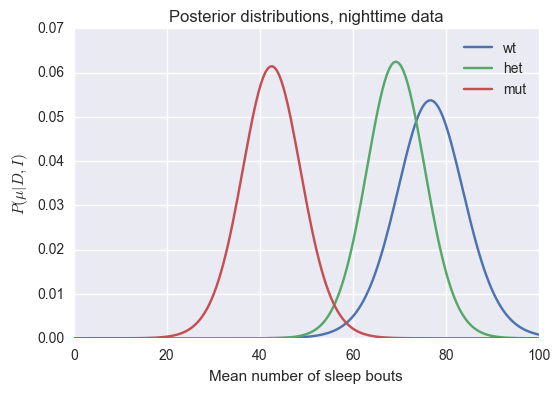

In [11]:
# Set up values of mu to consider in plot
mu = np.linspace(0.0, 100.0, 200)

# Compute posterior for each of the samples
post_wt,meanwt,varwt = student_t(mu, wtNight)
post_het,meanhet,varhet = student_t(mu, hetNight)
post_mut,meanmut,varmut = student_t(mu, mutNight)

# Plot the result
plt.plot(mu, post_wt)
plt.plot(mu, post_het)
plt.plot(mu, post_mut)
plt.xlabel('Mean number of sleep bouts')
plt.ylabel(r'$P(\mu|D,I)$')
plt.title('Posterior distributions, nighttime data')
lg = plt.legend(('wt', 'het', 'mut'), loc='upper right')

Notice that the intersection between the two curves is even smaller for the nighttime data. This is in line with the expectation that mutant species can't produce enough melatonin and have disturbed sleep patterns.

Let's find the intersection using the same approach as earlier:

In [12]:
distarray = [0] * 40
for i in range(80,120):
    distarray[i-80] = abs(post_wt[i] - post_mut[i])
distarray.index(min(distarray))

37

In [13]:
mu[37 + 80]

58.793969849246224

The intersection occurs at mu = 58.8, index = 117.

In [14]:
np.trapz(post_wt[0:117],mu[0:117])

0.01178128304103563

In [15]:
np.trapz(post_mut[117:200],mu[117:200])

0.0096926396645848015

The total area under the wild type posterior curve up to index = 117 is 1.2%. For the mutant curve, it is 1.0%. Overall, the intersection is (0.012 + 0.01) / (2 - 0.012 - 0.01) = 1.2% of the total area under both curves.

As expected, the nighttime data show more differences between the two curves than the daytime data do. This helps justify our choice of 6 consecutive minutes of zero activity as a valid definition for sleep.

Now, let's see if the daytime distributions follow a similar pattern. Note that since zebra fish are diurnal, we don't expect to see significant differences between the two daytime posteriors. 

In [16]:
fishIds = df_new.iloc[:, 0].tolist()
fishTypes = df_new.iloc[:,1].tolist()
fishActivity = df_new.iloc[:,6].tolist()

mutDay = []
wtDay = []
hetDay = []
totalZeroes = 0
totalPeriods = 0
totalZeroesWt = 0
totalPeriodsWt = 0
totalZeroesMut = 0
totalPeriodsMut = 0
num_sleep = 0
sleepind = 0
for i in range(len(fishIds)):
    if (i > 0 and fishIds[i] != fishIds[i-1]):
        if (fishTypes[i-1] == "wt"):
            wtDay.append(num_sleep)
            sleepind = 0
            num_sleep = 0
        elif (fishTypes[i-1] == "mut"):
            mutDay.append(num_sleep)
            sleepind = 0
            num_sleep = 0
        else:
            hetDay.append(num_sleep)
            sleepind = 0        
            num_sleep = 0
    if (fishActivity[i] >= 0.001):
        sleepind = 0
    if (fishActivity[i] < 0.001):
        sleepind += 1
    if (sleepind == 5):
        num_sleep += 1
        sleepind = 0

mutDay = np.asarray(mutDay)
hetDay = np.asarray(hetDay)
wtDay = np.asarray(wtDay)

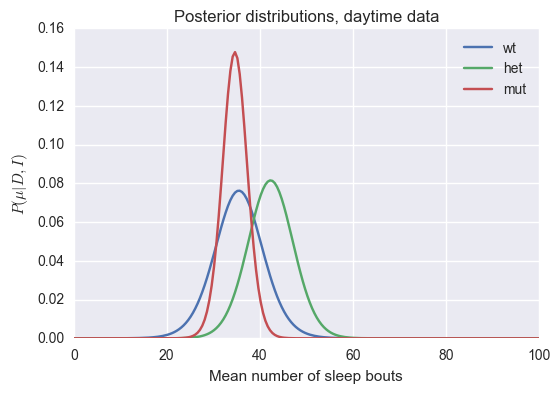

In [17]:
# Set up values of mu to consider in plot
mu = np.linspace(0.0, 100.0, 200)

# Compute posterior for each of the samples
post_wt,meanwt,varwt = student_t(mu, wtDay)
post_het,meanhet,varhet = student_t(mu, hetDay)
post_mut,meanmut,varmut = student_t(mu, mutDay)

# Plot the result
plt.plot(mu, post_wt)
plt.plot(mu, post_het)
plt.plot(mu, post_mut)
plt.xlabel('Mean number of sleep bouts')
plt.ylabel(r'$P(\mu|D,I)$')
plt.title('Posterior distributions, daytime data')
lg = plt.legend(('wt', 'het', 'mut'), loc='upper right')

Notice that all three curves have similar posterior distributions for the daytime data. This corroborates our previous argument. Also note that the difference between the daytime and the nighttime means is minimal for the mutant strains and quite large for the other two. 

Overall, we conclude that 6 consecutive minutes of zero activity is a valid metric to quantify sleep. 

Now, let's turn our attention to our second metric:

Method 2: We say that a zebrafish is asleep for a period T if its mean activity is less than 1.1 averaged over T. Because zebrafish are diurnal, the parameter of consideration here is mean nighttime activity. In our analysis, we will compute the mean nighttime activity for each fish and see if the posterior distributions show different patterns for the wild type and mutant strains. Just as earlier, our definition is arbitrary, but if it matches our expectations (which can be summed as similar sleep patterns for the heterogenous and wild type strains and different ones for the mutant strains), then it is justifiable. 

The code below computes the mean nighttime activity for each fish and plots the posterior distributions. 

<div class="alert alert-info">I still think that you could consider this a good parameter (because of your knowledge of zebrafish sleep) even if it didn't separate the mut from the wt! Also, to be more clear, give 1.1 units! (I thinks is active s / minute, right?)</div>

In [18]:
fishIds = df_newNight.iloc[:, 0].tolist()
fishTypes = df_newNight.iloc[:,1].tolist()
fishActivity = df_newNight.iloc[:,6].tolist()

mutActivityNight = []
wtActivityNight = []
hetActivityNight = []
totalActivity = 0;
totalTimes = 0;

for i in range(len(fishIds)):
    if (i > 0 and fishIds[i] != fishIds[i-1]):
        if (fishTypes[i-1] == "wt"):
            wtActivityNight.append(totalActivity/totalTimes)
            totalActivity = 0;
            totalTimes = 0;
        elif (fishTypes[i-1] == "mut"):
            mutActivityNight.append(totalActivity/totalTimes)
            totalActivity = 0;
            totalTimes = 0;
        else:
            hetActivityNight.append(totalActivity/totalTimes)
            totalActivity = 0;
            totalTimes = 0;
    totalActivity += fishActivity[i]
    totalTimes += 1;  

totalMutActivity = 0
totalHetActivity = 0
totalWtActivity = 0
for i in range(len(mutActivityNight)):
    totalMutActivity += mut[i]
for i in range(len(hetActivityNight)):
    totalHetActivity += het[i]
for i in range(len(wtActivityNight)):
    totalWtActivity += wt[i]

mutActivityNight = np.asarray(mutActivityNight)
hetActivityNight = np.asarray(hetActivityNight)
wtActivityNight = np.asarray(wtActivityNight)


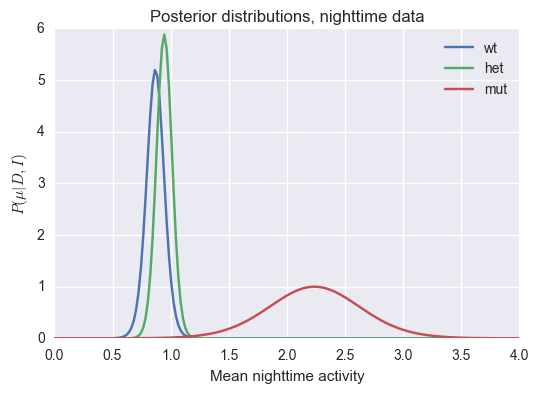

In [19]:
# Set up values of mu to consider in plot
mu = np.linspace(0.0, 4.0, 200)

# Compute posterior for each of the samples
post_wt,meanwt,varwt = student_t(mu, wtActivityNight)
post_het,meanhet,varhet = student_t(mu, hetActivityNight)
post_mut,meanmut,varmut = student_t(mu, mutActivityNight)

# Plot the result
plt.plot(mu, post_wt)
plt.plot(mu, post_het)
plt.plot(mu, post_mut)
plt.xlabel('Mean nighttime activity')
plt.ylabel(r'$P(\mu|D,I)$')
plt.title('Posterior distributions, nighttime data')
lg = plt.legend(('wt', 'het', 'mut'), loc='upper right')

Notice that the mutant strain is significantly far away from the other two strains, which are very close to one another. As expected, mean nighttime activity for the mutant strain is much higher than that of both wild type and heterogenous strains. 

It's clear from the plot that the intersection is extremely small, but let's calculate it numerically:

<div class="alert alert-info">I think a swarm or eCDF plot might have revealed the mutant outliers that both increase the mean nighttime activity and its variance. </div>

In [20]:
distarray = [0] * 25
for i in range(50,75):
    distarray[i-50] = abs(post_wt[i] - post_mut[i])
distarray.index(min(distarray))

7

Intersection index = 7 + 50 = 57

In [21]:
np.trapz(post_wt[57:200],mu[57:200])

0.0011594138531334983

In [22]:
np.trapz(post_mut[0:57],mu[0:57])

0.0051604179874921103

Intersection corresponds to (0.001 + 0.005)/(2-0.001-0.005) = 0.3% of the total area.

Clearly, our definition of sleep is consistent with our earlier findings that differentiate between the sleep patterns of  mutants versus others. Also note that only a small fraction of wild type and heterogenous fish have a higher mean nighttime activity than 1.1. Under the assumption that wild type fish are diurnal, we expect to see only a small percentage of fish that exceed our threshold of 1.1. 

Let's calculate the percentage of wild type fish that exceed the threshold:

In [23]:
distarray = [0] * 25
for i in range(50,75):
    distarray[i-50] = abs(mu[i] - 1.1)
distarray.index(min(distarray))

5

In [24]:
np.trapz(post_wt[55:200],mu[55:200])

0.0034564968266298643

Only 0.3% of wild type fish have a mean nighttime activity of over 1.1. 

This shows that while our definition was on the conservative side, it is justifiable. Zebrafish that show less mean activity than 1.1 over a time period can be considered "sleeping", based on the data. 

<div class="alert alert-info">Good job applying the Bayesian techniues from class and thinking carefully about the goodness of metric! A few things that could improve your analysis- actually report the mean parameter value that you get from the posterior. Also, plot all the data before you start applying statistical tests to it - this might give you better intuition for the goodness of the metric, or the reliability of the result, or which analysis approach is most effective. Also, be careful when defining your goodness of metric. There are many other factors you might have considered - e.g. how much information the metric captures, how it reflects you knowledge of sleep (in humans or in zebrafish), etc. Also, which approach would you prefer and why? 75/80 </div>